# Titanic Passengers Survival Prediction

After many exercises and tutorial videos/books, I am taking a bold step by trying to predict survivors of the Titanic Ship sink.

#Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Choosing the Best Model
7. Creating Submission File
Any and all feedback is welcome! 

I have divide this task into 2 Notebooks. This Notebook contains items 1,2,3 and 4 while the other part is dedicated to the 
training and selection of the best model and submission of file. I ask some important questions along the way, they made 
the analysis process easier.

# 1. Import Necessary Libraries

We need to first import the necessary Pyhton tools like pandas,numpy,seaborn etc 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
%matplotlib inline

# 2. Read and Explore Data

Read in the dataset and explore for insight

In [4]:
passengers=pd.read_csv('train (1).csv')


#PROBING: Asking questions that may lead to insight from dataset
#Q1. Who are the passengers?

In [5]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
passengers.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 3. Data Analysis

In [7]:
passengers.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
passengers.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From analysis:
    1. There are 12 columns (also called Fatures)
        CLASSES OF FEATURES
        Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
        Categorical Features: Survived, Sex, Embarked, Pclass
        Alphanumeric Features: Ticket, Cabin
        
            What are the data types for each feature?
            Survived: int
            Pclass: int
            Name: string
            Sex: string
            Age: float
            SibSp: int
            Parch: int
            Ticket: string
            Fare: float
            Cabin: string
            Embarked: string

In [10]:
print(pd.isnull(passengers).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# There are 891 passengers aboard the ship.
The Cabin column has more missing values than any other column. This may be because much importance was not added to the 
passenger's cabin.
Age column too has some missing values that can still be filled if we like. Embarked has only two missing values

** Plotting the number of passengers according to sex

# 4. Data Visualization

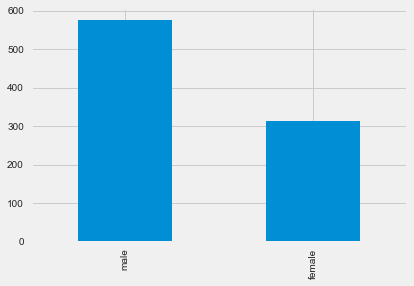

In [11]:
#install seaborn
#sns.factorplot('Sex',data=passengers)
#sns.factorplot('Age',data=passengers)
#factorplot did not work here
plt.style.use('fivethirtyeight')

passengers['Sex'].value_counts().plot.bar()

**Seperating children from adults to ensure accurate analysis/prediction

In [12]:
#extending usefulness
def adult_child(passengers_df):
    age,sex=passengers_df
    
    if age<16:
        return 'Child'
    else:
        return sex

In [13]:
passengers['Category']=passengers[['Age','Sex']].apply(adult_child,axis=1)

In [14]:
passengers.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


You can use any of matplotlib inbuilt styles to beautify plots. Some of the styles are: whitegrid, ggplot, fivethirtyeight etc

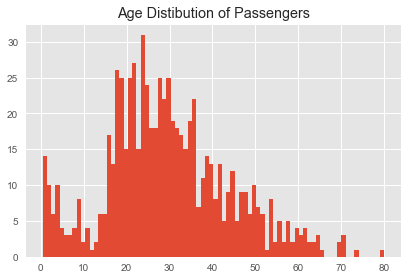

In [16]:
plt.style.use('ggplot')
plt.title('Age Distibution of Passengers')
passengers['Age'].hist(bins=80)

In [17]:
#Use any of the two
np.mean(passengers['Age'])

29.69911764705882

In [18]:
passengers['Age'].mean()

29.69911764705882

In [19]:
passengers['Category'].value_counts()

male      537
female    271
Child      83
Name: Category, dtype: int64

Following is 3 different Multi-Feature plots

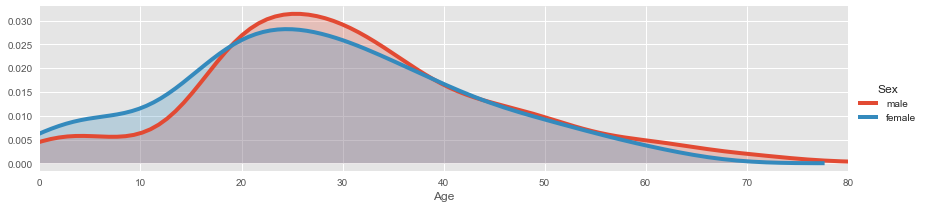

In [20]:
fig=sns.FacetGrid(passengers,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=passengers['Age'].max()
fig.set(xlim=(0,oldest))
#fig.set(ylim=(0,0.05))
fig.add_legend()

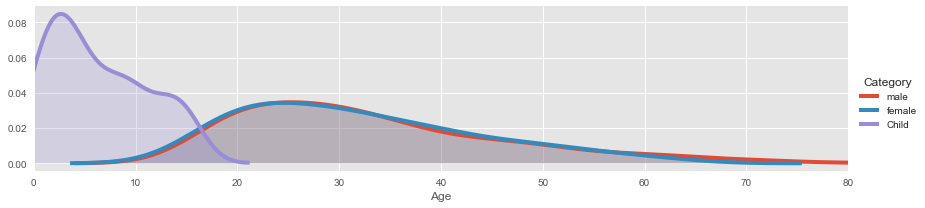

In [21]:
fig=sns.FacetGrid(passengers,hue='Category',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=passengers['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

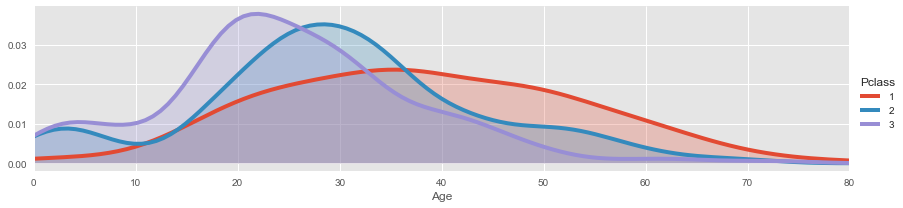

In [22]:
fig=sns.FacetGrid(passengers,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest=passengers['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [23]:
cabins=passengers['Cabin'].dropna()
cabins.value_counts()
cabins.head(12)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
Name: Cabin, dtype: object

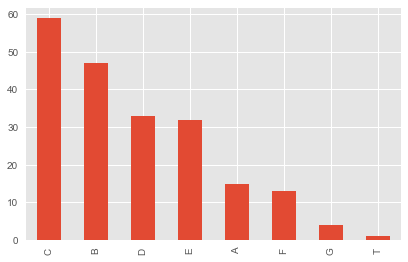

In [24]:
#Q2. What deck were the passengers on, and how does it relate to survival?
levels=[]
for level in cabins:
    levels.append(level[0])

cabin=DataFrame(levels)
cabin.columns=['Cabin']
#sns.factorplot('Level',data=cabin,palette='winter_d')
cabin['Cabin'].value_counts().plot.bar()


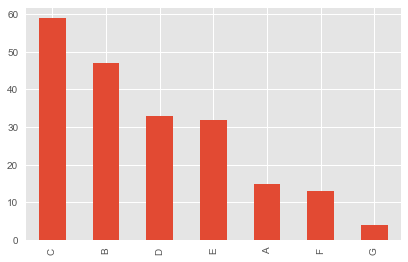

In [25]:
cabin=cabin[cabin.Cabin !='T']
cabin['Cabin'].value_counts().plot.bar()

#Q3. Who was alone and who was with family?

In [26]:
def alone(passenger):
    parch,sibsp=passenger
    nFamily=parch+sibsp
    
    if nFamily<1:
        return 'Alone'
    else:
        return 'Not Alone'

In [27]:
passengers['Alone']=passengers[['Parch','SibSp']].apply(alone,axis=1)

passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


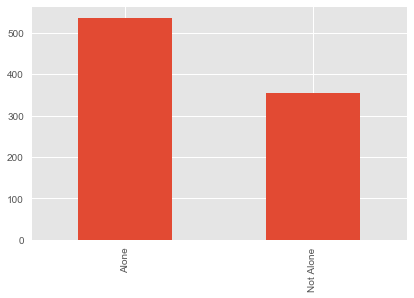

In [28]:
passengers['Alone'].value_counts().plot.bar()

In [29]:
#Q4. What factor(s) affect survival?
#plt.style.use('fivethirtyeight')

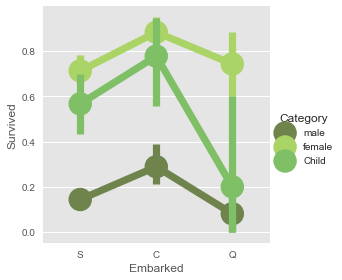

In [30]:
sns.factorplot('Embarked','Survived',hue='Category',data=passengers,palette='summer_d')

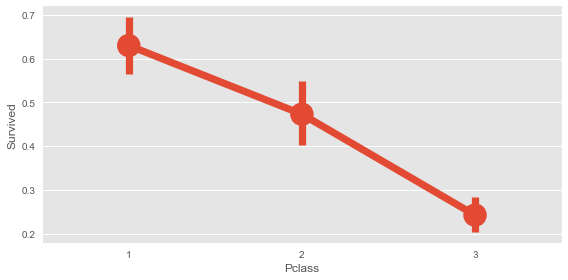

In [31]:
sns.factorplot('Pclass','Survived',data=passengers,aspect=2)

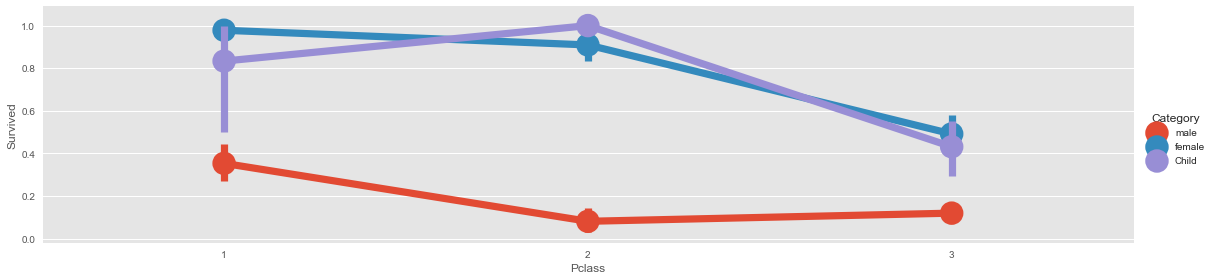

In [32]:
sns.factorplot('Pclass','Survived',hue='Category',data=passengers,aspect=4)

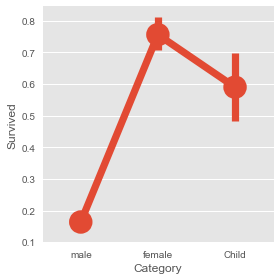

In [33]:
sns.factorplot('Category','Survived',data=passengers)

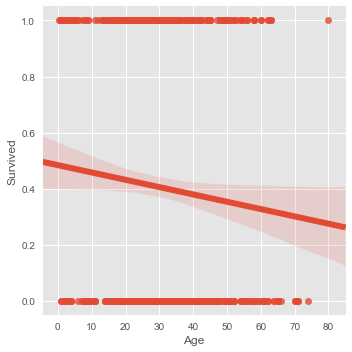

In [34]:
sns.lmplot("Age","Survived",data=passengers)

In [35]:
#ASIDE: Getting specific item
passengers[passengers['Age']>=80].head()
#passengers.iloc([passengers['Age']>=80])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Alone
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,male,Alone


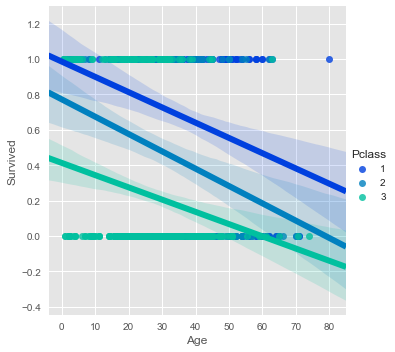

In [36]:
sns.lmplot("Age","Survived",hue='Pclass',data=passengers,palette='winter')

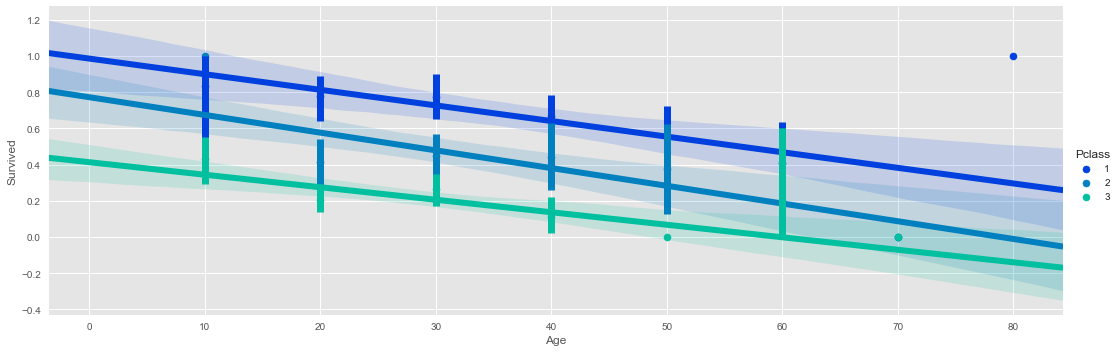

In [37]:
#Cleaning data by using age groups
age_groups=[10,20,30,40,50,60,70,80]
sns.lmplot("Age","Survived",hue='Pclass',data=passengers,palette='winter',x_bins=age_groups,aspect=3)

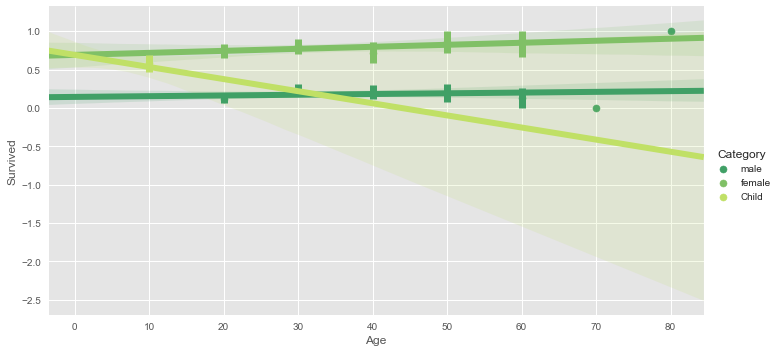

In [38]:
sns.lmplot("Age","Survived",hue='Category',data=passengers,palette='summer',x_bins=age_groups,aspect=2)

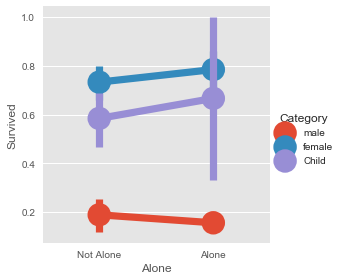

In [39]:
sns.factorplot('Alone','Survived',hue='Category',data=passengers)

# Other Questions

Number of survivors in each class
 Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

Total number of passengers in each class
 Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


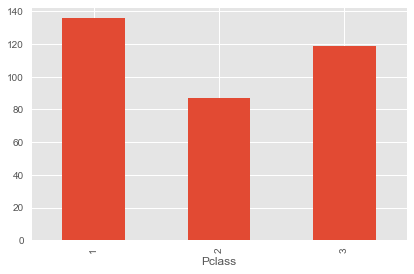

In [40]:
# 1. Which passenger class has the highest number of survivors?
survivors=passengers.groupby('Pclass')['Survived'].agg(sum)
totalPassengers=passengers.groupby('Pclass')['PassengerId'].count()
print("Number of survivors in each class\n",survivors)
print("\nTotal number of passengers in each class\n",totalPassengers)

survivors.plot.bar()

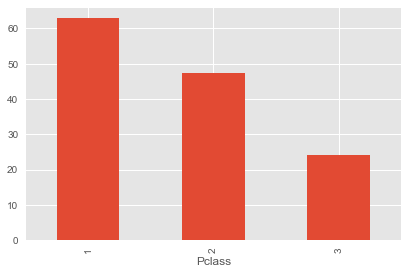

In [41]:
#1a Showing percentages
survivor_percentage=survivors/totalPassengers*100
survivor_percentage.plot.bar()

OBSERVATION: 63% of passengers in Pclass 1 survived.
             47% of passengers in Pclass 2 survived.
        A mearge 24%(less than a quarter) of passengers in Pclass 3 survived.
        Priority was given to the rescue of passengers in Pclass 1 and then those in Pclass 2
        ADVICE: Get endowed with cash and always travel in First Class, it gives you a better chance of survival..winks...smile

In [42]:
# FIRE! POWER! WATER!
print(passengers['Category'].value_counts())
category=['female','male','Child']
for sex in category:
    nSex=passengers[passengers['Category']==sex].groupby('Pclass')['PassengerId'].count()
    if(sex=='Child'):
        sex='Children'
    print('\n'+str.capitalize(sex)+' passengers according to class:\n',nSex)

male      537
female    271
Child      83
Name: Category, dtype: int64

Female passengers according to class:
 Pclass
1     91
2     66
3    114
Name: PassengerId, dtype: int64

Male passengers according to class:
 Pclass
1    119
2     99
3    319
Name: PassengerId, dtype: int64

Children passengers according to class:
 Pclass
1     6
2    19
3    58
Name: PassengerId, dtype: int64


# 2. What is the distribution of survivors based on gender among the classes

In [44]:

for sex in category:
    nSex=passengers[passengers['Category']==sex].groupby('Pclass')['Survived'].agg(sum)
    if(sex=='Child'):
        sex='Children'
    print('\n'+str.capitalize(sex)+' survivors according to class:\n',nSex)


Female survivors according to class:
 Pclass
1    89
2    60
3    56
Name: Survived, dtype: int64

Male survivors according to class:
 Pclass
1    42
2     8
3    38
Name: Survived, dtype: int64

Children survivors according to class:
 Pclass
1     5
2    19
3    25
Name: Survived, dtype: int64


# Further Observation
    Based on the analysis in the last two cells:
#1. Children and females in the 1st and 2nd class had higher chances of survival. Infact, all the children in the second class
 survived
#2. The male folks suffered the greates loss. Such a world that favours females more than males
#3. It is advisable to travel in first class, you have a higher chance of survival. At worst, travel in second class

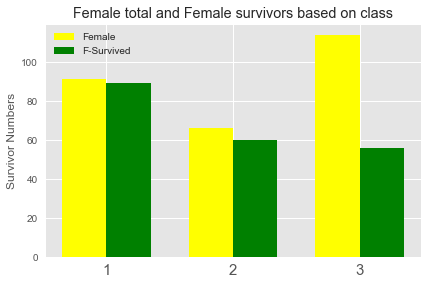

In [43]:
#More work to do.........
female_survivors=passengers[passengers['Category']=='female'].groupby('Pclass')['Survived'].agg(sum)
female_class=passengers[passengers['Category']=='female'].groupby('Pclass')['PassengerId'].count()


fig = plt.figure()
ax = fig.add_subplot(111)
index = np.arange(female_class.count())
bar_width = 0.35
rect1 = ax.bar(index, female_class, bar_width, color='yellow',label='Female')
rect2 = ax.bar(index + bar_width, female_survivors, bar_width,color='green', label='F-Survived')
ax.set_ylabel('Survivor Numbers')
ax.set_title('Female total and Female survivors based on class')

xTickMarks = female_survivors.index.values.tolist()
ax.set_xticks(index + (bar_width/2))
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, fontsize=15)
plt.legend()
plt.show()

# Q3. What is the distribution of non-survivors among the various classes for people who have family aboard the ship?

In [48]:
nc=passengers[(passengers['SibSp']>0) | (passengers['Parch']>0) & (passengers['Survived']==0)].groupby('Pclass')['Survived'].count()
nc

Pclass
1     88
2     66
3    153
Name: Survived, dtype: int64

In [49]:
#Q4. Classifying according to age group

In [50]:
age_groups=[0,15,25,40,60,80]
passengers['Age Group']=pd.cut(passengers['Age'],age_groups)
#passengers['Age Group'].dropna(inplace=True)
#
passengers['Age Group'].count()

714

In [51]:
passengers.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Category,Alone,Age Group
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,male,Not Alone,"(25, 40]"
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q,male,Alone,NaN
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S,male,Not Alone,"(25, 40]"
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,male,Alone,"(25, 40]"
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S,female,Alone,"(15, 25]"


% of people travelling with family that survived : 50.5649717514
% of people travelling alone that survived : 30.3538175047


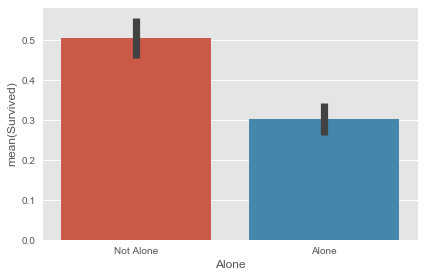

In [52]:
sns.barplot('Alone','Survived',data=passengers)

print('% of people travelling with family that survived :',passengers['Survived'][passengers['Alone']=='Not Alone'].
value_counts(normalize=True)[1]*100)

print('% of people travelling alone that survived :',passengers['Survived'][passengers['Alone']=='Alone'].value_counts(
normalize=True)[1]*100)